# Проект: Исследование стартапов

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

Чтобы ваше исследование шло оптимальным путём, рекомендуем чётко следовать предложенным дальше шагам. Углублённая предобработка и исследование неприоритетных для проекта вопросов может потребовать много дополнительного времени.

В процессе работы старайтесь записывать свои рассуждения — это полезная привычка во время обучения. Пользуйтесь общими правилами:

- начните с введения, в котором опишите контекст и цели проекта в целом;
- записывайте в комментариях к коду всё, что относится к нему или алгоритму;
- основания совершаемых в проекте действий и выводы, которые касаются предмета исследования, — записывайте в ячейках типа Markdown;
- после каждого крупного раздела — шага проекта — обязательно формулируйте промежуточные выводы.

# Описание проекта
В данном проекте проводилось исследование распределения финансовых показателей различных стартапов, особенно тех, которые относятся к категориям `Automotive`, `Nanotech` и `Cleantech`. Основные этапы работы включали:

1. Анализ статистик: Для оценки центральных тенденций использовались такие меры, как среднее значение, медиана и процентили. Было установлено, что распределение значений сильно смещено вправо, что свидетельствует о наличии выбросов.

2. Идентификация выбросов: Были определены верхняя и нижняя границы выброса. Выявлено, что большинство значений выше 50 млн рублей можно считать выбросами.

3. Выбор категорий: В результате анализа выделены три ключевые категории по средним размерам финансирования:
  - `Automotive`
  - `Nanotech`
  - `Cleantech`

4. Оценка разброса: Определены категории с наибольшим разбросом цен, что важно для выявления потенциальных рисков и возможностей высоких доходов:
  - `Automotive`
  - `Social`
  - `Nanotech`

5. Фокус на `Automotive` и `Nanotech`: Исходя из сочетания высокой средней суммы финансирования и значительного разброса цен, эти категории стали основными объектами исследования.

6. Анализ количества раундов финансирования: Исследованы различия в количестве раундов финансирования для разных типов компаний:
  - `Acquired` (приобретённые): Среднее число раундов = 0.52.
  - `Closed` (закрытые): Среднее число раундов = 1.38.
  - `IPO` (вышедшие на IPO): Среднее число раундов = 1.93.
  - `Operating` (операционные): Среднее число раундов = 1.52.


In [1]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Проверьте названия столбцов.


In [3]:
df_company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [4]:
df_acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [5]:
df_people.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [6]:
df_education.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [7]:
df_degrees.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.


In [8]:
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace('  ', '_')

<font color='#777778'>После проверки, выяснилось, что названия столбцов у датасетов `df_acquisition`, `df_people`, `df_education`,`df_degrees`в порядке и не требуют изменений. А вот датасет `df_company_and_rounds`, названия столбцов нужно было привести к одному виду, snake case.</font>

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [9]:
df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'])
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'])
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'])

In [10]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [11]:
df_company_and_rounds.duplicated().sum()

0

In [12]:
missing_company_and_rounds = (pd.DataFrame({'Количество пропусков': df_company_and_rounds.isnull().sum(), 
                                            'Доля пропусков': df_company_and_rounds.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing_company_and_rounds

,Количество пропусков,Доля пропусков
company_ID,302,0.001400
name,302,0.001400
category_code,73888,0.339300
status,302,0.001400
founded_at,107818,0.495100
closed_at,214325,0.984200
domain,70615,0.324300
network_username,122240,0.561300
country_code,109167,0.501300
investment_rounds,302,0.001400


<font color='#777778'>Датасет содержит 22 столбца и 217774 строк, в которых содержится информацию о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `float64(12)`, `object(10)`.
- Пропуски содержатся во многих столбцах. Изменен тип столбцов на дату: `founded_at`, `closed_at`, `funded_at`. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.</font>

In [13]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])

In [14]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [15]:
df_acquisition.duplicated().sum()

0

In [16]:
missing_acquisition = (pd.DataFrame({'Количество пропусков': df_acquisition.isnull().sum(), 
                                            'Доля пропусков': df_acquisition.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing_acquisition

,Количество пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100


<font color='#777778'>Датасет  содержит 6 столбца и 9407 строк, в которых содержится информацию о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `int64(4)`, `object(1)`.
- Пропуски содержатся в столбце `term_code` и немного `acquired_at`. Изменен тип столбцов на дату: `acquired_at`. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.</font>

In [17]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [18]:
df_people.duplicated().sum()

0

In [19]:
missing_people = (pd.DataFrame({'Количество пропусков': df_people.isnull().sum(), 
                                'Доля пропусков': df_people.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing_people

,Количество пропусков,Доля пропусков
id,0,0.000000
first_name,5,0.000000
last_name,1,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


<font color='#777778'>Датасет  содержит 5 столбца и 226709 строк, в которых содержится информацию о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `float(1)`, `int64(4)`, `object(3)`.
- Пропуски содержатся в столбце `company_id` и немного `network_username`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.</font>

In [20]:
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])

In [21]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [22]:
df_education.duplicated().sum()

0

In [23]:
missing_education = (pd.DataFrame({'Количество пропусков': df_education.isnull().sum(), 
                         'Доля пропусков': df_education.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing_education

,Количество пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
instituition,55,0.000500
graduated_at,51556,0.470400


<font color='#777778'>Датасет  содержит 4 столбца и 109610 строк, в которых содержится информацию об образовании сотрудника:

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `int64(2)`, `object(1)`.
- Пропуски содержатся в столбце `graduated_at` и немного `instituition`. Изменен тип столбцов на дату: `graduated_at`. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.</font>

In [24]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [25]:
df_degrees.duplicated().sum()

0

In [26]:
missing_degrees = (pd.DataFrame({'Количество пропусков': df_degrees.isnull().sum(), 
                                 'Доля пропусков': df_degrees.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing_degrees

,Количество пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11218,0.102300
subject,28312,0.258300


<font color='#777778'>Датасет  содержит 4 столбца и 109610 строк, в которых содержится информацию о типе образования сотрудника.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `int64(1)`, `object(3)`.
- Пропуски содержатся в столбце `subject` и немного `degree_type`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.</font>

<font color='#777778'>На основе первичного анализа данных, можно сформулировать следующие промежуточные выводы:

1. Структура данных
- Названия столбцов унифицированы и приведены к `snake_case`.
- Типы данных состоят преимущественно из числовых (`int64`, `float64`) и строковых значений (`object`), однако есть и столбцы, преобразованные в даты.

2. Пропущенные данные
В каждом датасете присутствуют пропуски в различных столбцах, что может повлиять на дальнейший анализ:
- В датасете `df_degrees`: пропуски в столбцах `subject` и частично в `degree_type`.
- В датасете `df_education`: пропуски в столбцах `graduated_at` и `institution`.
- В датасете `df_people`: пропуски в столбцах `company_id` и `network_username`.
- В датасете `df_acquisition`: пропуски в столбцах `term_code` и `acquired_at`.
- В датасете `df_company_and_rounds`: пропуски встречаются во множестве столбцов.

По предварительным данным, значения в столбцах соответствуют ожидаемым типам данных и описаниям. Некоторые столбцы были преобразованы в даты, такие как `graduated_at`, `acquired_at`, `founded_at`, `closed_at`, `funded_at`. Это свидетельствует о наличии временных меток, которые будут важны для анализа динамики событий.

- Датасеты различаются по количеству записей: от `9 407` до `226 709` строк.  
- Количество пропусков достаточно большое, чтобы их просто удалить. Учитывая высокую долю пропусков, удаление данных может существенно повлиять на объем выборки.
</font>

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `df_company_and_rounds`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [27]:
df_company_and_rounds['funded_year'] = df_company_and_rounds['funded_at'].dt.year


In [28]:
car_df = df_company_and_rounds.groupby('funded_year')['raised_amount'].agg(['median', 'count']).reset_index()

car_df = car_df[car_df['count'] > 50]

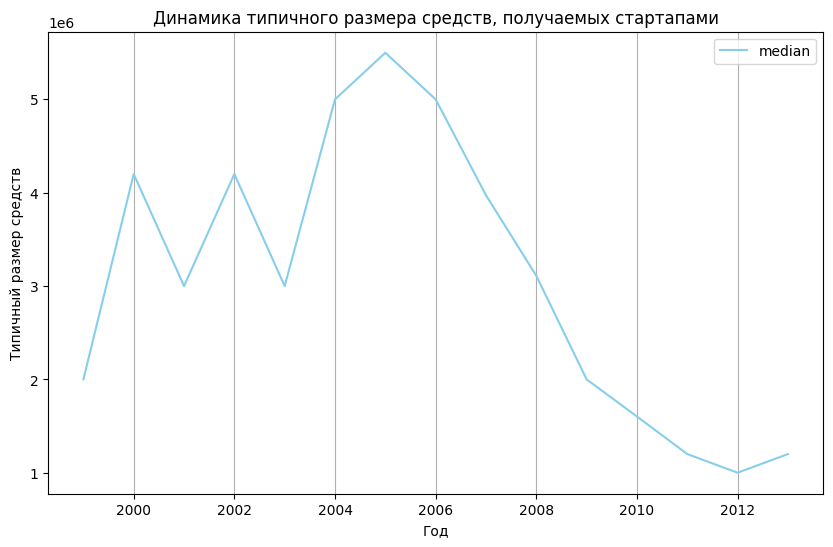

In [29]:
car_df.plot(kind= 'line',
            y= 'median',
            x= 'funded_year',
            color= 'skyblue',
            figsize= (10, 6),
            title= 'Динамика типичного размера средств, получаемых стартапами')

plt.xlabel('Год')
plt.ylabel('Типичный размер средств')

plt.grid(axis= 'x')

plt.show()

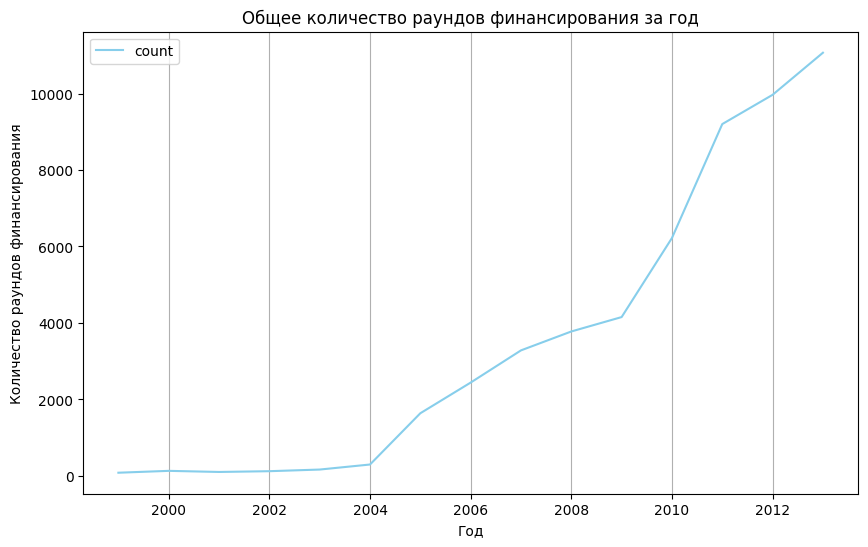

In [30]:
car_df.plot(kind= 'line',
            y= 'count',
            x= 'funded_year',
            color= 'skyblue',
            figsize= (10, 6),
            title= 'Oбщее количество раундов финансирования за год')

plt.xlabel('Год')
plt.ylabel('Количество раундов финансирования')

plt.grid(axis= 'x')

plt.show()

<font color='#777778'>Вопрос 1: В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Согласно данным, максимальный медианный размер собранных средств приходится на 2005 год — 5 500 000.

Вопрос 2: Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?
- Медиана собранных средств составила 1 200 000.
- Количество раундов составило 11 072.

Тенденция показывает снижение среднего размера сборов по сравнению с предыдущими годами, однако наблюдается значительный рост количества проведенных раундов. Это свидетельствует о том, что в 2013 году было больше мелких сделок, нежели крупных.
</font>


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `df_people` и `df_education`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `df_degrees`.

In [31]:
df_education_copy = df_education.copy()

df_education_copy = df_education_copy.drop_duplicates(subset= 'person_id')

In [32]:
df_people_education = pd.merge(df_people, df_education_copy, left_on= 'id', right_on= 'person_id', how= 'left')

df_people_education_full = pd.merge(df_people, df_education, left_on= 'id', right_on= 'person_id', how= 'left')

In [33]:
df_people_education['cut_instituit'] = pd.cut(df_people_education['company_id'].value_counts(), bins= [0, 50, 100, 300], labels= ['малые', 'средние', 'крупные'])

df_people_education_full['cut_instituit'] = pd.cut(df_people_education_full['company_id'].value_counts(), bins= [0, 50, 100, 300], labels= ['малые', 'средние', 'крупные'])

In [34]:
df_people_education['has_education'] = ~pd.isnull(df_people_education['instituition'])

df_people_education_full['has_education'] = ~pd.isnull(df_people_education_full['instituition'])


In [35]:
df_false = df_people_education[df_people_education['has_education'] == False]

df_false_full = df_people_education_full[df_people_education_full['has_education'] == False]

In [36]:
(df_false.groupby('cut_instituit')['id_x'].count() / df_people_education.groupby('cut_instituit')['id_x'].count()).round(2) # Если удалить дубликаты, про несколько мест учебы

cut_instituit
малые      0.73
средние    0.80
крупные    0.67
Name: id_x, dtype: float64

In [37]:
(df_false_full.groupby('cut_instituit')['id_x'].count() / df_people_education_full.groupby('cut_instituit')['id_x'].count()).round(2) # С дубликатами

cut_instituit
малые      0.62
средние    0.60
крупные    1.00
Name: id_x, dtype: float64

<font color='#777778'>
От части странная задача, в таблице `education` и `degrees`, есть дубликаты, как я понимаю, некоторые люди указали несколько мест учебы. Как по мне логично удалить данные дубликаты и оставить один вариант. 

Для выполнения задания возможно присоединить к этим таблицам ещё и таблицу degrees.csv, но нужно также удалить дубликаты. 

Разделение на 'малые', 'средние', 'крупные', основан на практических наблюдениях за изменениями в управлении и администрировании компаний различных размеров. </font>

<font color='#777778'>Вывод:

- Малые компании: Полнота сведений об образовании сотрудников составляет 73%. Это означает, что в малых компаниях информация об образовании сотрудников заполнена примерно на 73%.
- Средние компании: Полнота сведений об образовании сотрудников составляет 80%. Это указывает на то, что в средних компаниях информация об образовании сотрудников заполнена лучше, чем в малых.
- Крупные компании: Полнота сведений об образовании сотрудников составляет 67%. Это говорит о том, что в крупных компаниях информация об образовании сотрудников заполнена хуже, чем в средних и малых.

Общие выводы:
- Полнота сведений об образовании сотрудников зависит от размера компании. В средних компаниях информация об образовании сотрудников заполнена лучше всего, в то время как в крупных компаниях — хуже всего.
- Это может быть связано с тем, что в небольших и средних компаниях проще контролировать и собирать информацию о сотрудниках, в то время как в крупных компаниях процесс сбора данных может быть более сложным и трудоемким.

Таким образом, заказчик может сделать вывод, что размер компании действительно влияет на полноту сведений о сотрудниках, и что для улучшения сбора данных в крупных компаниях могут потребоваться дополнительные ресурсы и усилия.</font>

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [38]:
print("Количество записей:")
print(len(df_company_and_rounds['network_username']))
print(len(df_people['network_username']))

Количество записей:
217774
226709


In [39]:
# Получаем уникальные значения в каждом датафрейме
unique_usernames_edu = set(df_company_and_rounds['network_username'])
unique_usernames = set(df_people['network_username'])

# Пересечение множеств
common_usernames = unique_usernames.intersection(unique_usernames_edu)

print(len(unique_usernames_edu))
print(len(unique_usernames))

print(f"Общее количество уникальных имен пользователей: {len(common_usernames)}")

79572
38422
Общее количество уникальных имен пользователей: 2200


In [40]:
total_records = len(df_company_and_rounds) + len(df_people)
common_percentage = len(common_usernames) / total_records * 100

print(f"Процент общих записей: {common_percentage:.2f}%")

Процент общих записей: 0.49%


<font color='#777778'>
Процент совпадений низкий (< 50%), лучше пересмотреть подход к объединению. Так как процент совпадений низкий, я бы не стал использовать столбцы с именем network_username для объединения данных. </font>


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `df_company_and_rounds`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [41]:
companies_df = df_company_and_rounds[['company_ID', 'name', 'category_code', 'status', 
                                      'founded_at', 'closed_at', 'domain', 'network_username', 
                                      'country_code', 'investment_rounds', 'funding_rounds', 
                                      'funding_total', 'milestones']]

print(f'В датасете companies_df всего строк {companies_df.shape[0]}, найдено: {companies_df.duplicated(). sum()} дубликатов')

companies_df = companies_df.drop_duplicates()

print(f'Осталось строк {companies_df.shape[0]}, после удаления дубликатов')

В датасете companies_df всего строк 217774, найдено: 21220 дубликатов
Осталось строк 196554, после удаления дубликатов


In [42]:
rounds_df = df_company_and_rounds[['company_ID', 'name', 'raised_amount', 'funding_round_id', 
                                   'funded_at', 'funding_round_type', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'funded_year']]

print(f'В датасете rounds_df всего строк {rounds_df.shape[0]}, найдено: {rounds_df["funding_round_id"].isna(). sum()} пропусков')

rounds_df = rounds_df.dropna(subset= ['funding_round_id'])

print(f'Осталось строк {rounds_df.shape[0]}, после удаления пропусков')

В датасете rounds_df всего строк 217774, найдено: 164846 пропусков
Осталось строк 52928, после удаления пропусков



## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `df_company_and_rounds` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [43]:
new_df = companies_df[(companies_df['funding_rounds'] >= 1) | 
                              (companies_df['investment_rounds'] >= 1) | 
                              (companies_df['status'] == 'acquired')]

new_df['funding_total'] = new_df['funding_total'].astype('int')

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  int32         
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int32(1), object(6)
memory


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

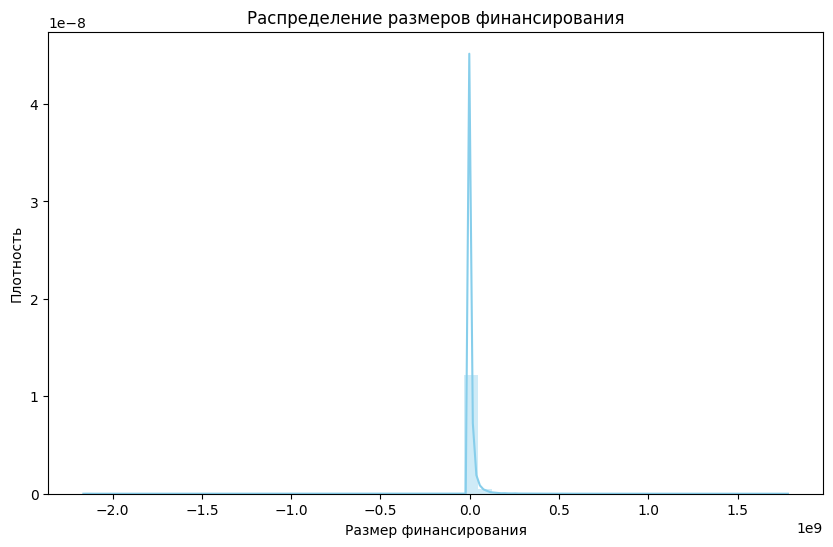

In [45]:
plt.figure(figsize= (10, 6))

# Строим график плотности распределения
sns.distplot(new_df['funding_total'], color= 'skyblue')

plt.title("Распределение размеров финансирования")
plt.xlabel("Размер финансирования")
plt.ylabel("Плотность")

plt.show()

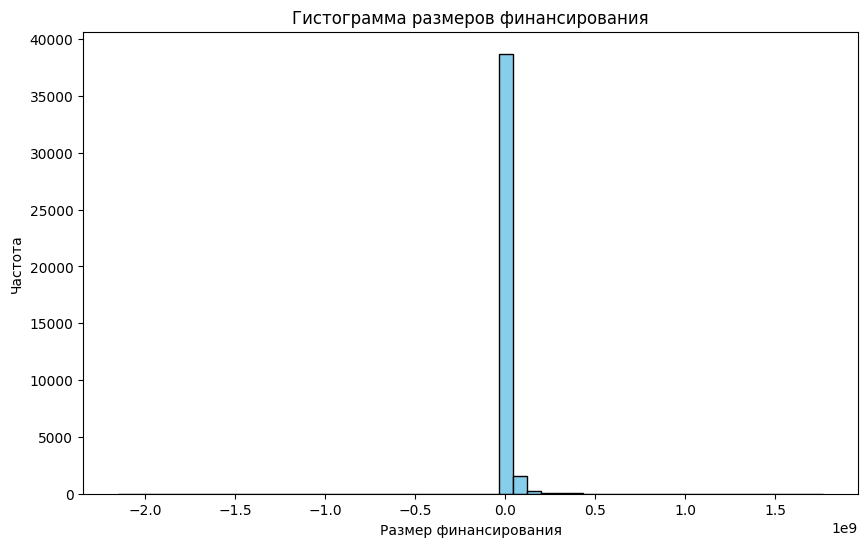

In [46]:
plt.figure(figsize= (10, 6))

# Строим гистограмму
plt.hist(new_df['funding_total'], bins= 50, color= 'skyblue', edgecolor= 'black')

plt.title("Гистограмма размеров финансирования")
plt.xlabel("Размер финансирования")
plt.ylabel("Частота")

plt.show()

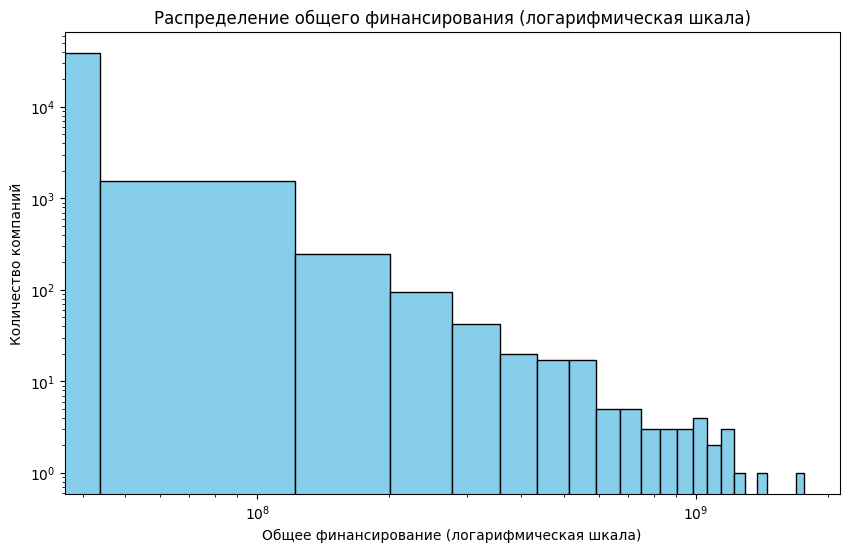

In [47]:
plt.figure(figsize= (10, 6))

plt.hist(new_df['funding_total'], bins= 50, color='skyblue', edgecolor='black', log=True)

plt.xscale('log')  # Логарифмическая шкала по оси X

plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')

plt.show()

In [48]:
stats = new_df['funding_total'].describe()
print(stats)


count    4.074700e+04
mean     9.452169e+06
std      4.613801e+07
min     -2.147484e+09
25%      0.000000e+00
50%      6.000000e+05
75%      5.644760e+06
max      1.765500e+09
Name: funding_total, dtype: float64


<font color='#777778'>Для данного набора данных стандартные методы вроде среднего значения могут давать искаженную картину из-за сильных выбросов. Более адекватной мерой центрального значения будет медиана, а для анализа распределения полезно использовать процентили.</font>








### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [49]:
company_sell = new_df[((new_df['investment_rounds'] == 0) | 
                       (new_df['investment_rounds'] == 1)) & (new_df['funding_total'] > 0)]

company_sell = company_sell[company_sell['status'] == 'acquired']

company_sell.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000,3.0
79,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000,3.0
103,1007.0,Rupture,games_video,acquired,NaT,NaT,rupture.com,rupture,USA,0.0,1.0,3000000,2.0
206,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000,2.0
217,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000,1.0


In [50]:
Q1 = company_sell['funding_total'].quantile(0.25)
Q3 = company_sell['funding_total'].quantile(0.75)

IQR = Q3 - Q1

lower_line = Q1 - 1.5 * IQR
upper_line = Q3 + 1.5 * IQR

print(f'25 квартиль: {Q1}') 
print(f'75 квартиль: {Q3}')
print(f'Межквартильный размах: {IQR}')
print(f'Нижний порог: {lower_line}')
print(f'Верхний порог: {upper_line}')

25 квартиль: 2900000.0
75 квартиль: 21460700.0
Межквартильный размах: 18560700.0
Нижний порог: -24941050.0
Верхний порог: 49301750.0


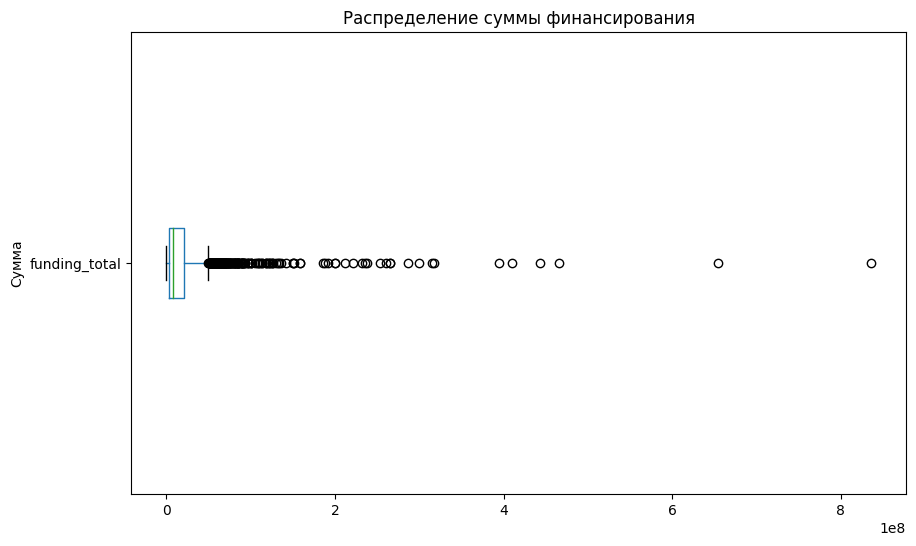

In [51]:
company_sell['funding_total'].plot(kind= 'box',
                                   vert= False,
                                   figsize= (10, 6),
                                   title= 'Распределение суммы финансирования')

plt.ylabel('Сумма')
plt.show()

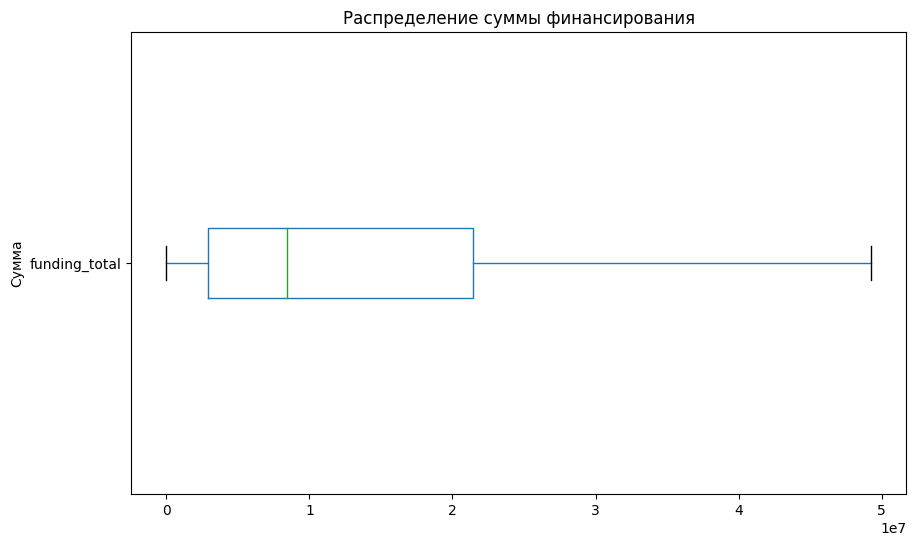

In [52]:
company_sell['funding_total'].plot(kind= 'box',
                                   vert= False,
                                   figsize= (10, 6),
                                   showfliers=False,
                                   title= 'Распределение суммы финансирования')

plt.ylabel('Сумма')
plt.show()

<font color='#777778'>Таким образом, верхняя и нижняя границы выброса составляют:
- Нижняя граница: −24942050.
- Верхняя граница: 49351750.

Распределение значений асимметричное, скошенное вправо. Минимальная сумма — 3750, а максимальный — 835750000. Среднее значение соответствует 19311414, тогда как медиана — 8400000. Среднее и медианное значение отличаются сильно. По гистограмме размаха видно, что значения выше примерно 50000000 можно считать выбросами.
</font>


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [53]:
filtered_data = new_df[(new_df['investment_rounds'] != 0) & (new_df['funding_total'] != 0)]

In [54]:
filtered_data.groupby('category_code', 
                     as_index= False).agg({'funding_total': ['std',
                                                             'median']}).sort_values(('funding_total', 
                                                                                    'median'), ascending= False)

category_code funding_total             
                               std       median
18          nanotech           NaN  502860000.0
6          education  5.271481e+08  377250000.0
12       hospitality           NaN  133663000.0
20              news  1.187974e+08  125440000.0
27     semiconductor  8.789090e+07   93329100.0
23  public_relations  3.053960e+08   69477100.0
30    transportation           NaN   60704400.0
16         messaging  5.310188e+07   47548700.0
24       real_estate           NaN   45900000.0
5          ecommerce  1.122818e+08   40600000.0
15           medical  9.545942e+06   33250000.0
19   network_hosting  9.652282e+07   31000000.0
31               web  3.604217e+08   30600000.0
7         enterprise  4.189440e+07   30000000.0
9        games_video  2.229254e+08   27450000.0
10          hardware  3.441952e+08   26879150.0
26          security  4.144115e+07   24700000.0
21         nonprofit           NaN   23000000.0
29          software  9.996477e+07   20400000.0
13             legal           NaN   16554300.0
25            search  6.934794e+07   16050000.0
2            biotech  8.246780e+07   15948800.0
14     manufacturing  4.276191e+07   13200000.0
0        advertising  8.772609e+07   11800000.0
11            health  2.427190e+07   10335000.0
3          cleantech  1.464782e+08    8906850.0
8            finance  4.270880e+07    7196200.0
17            mobile  6.231051e+08    6282250.0
28            social  1.253340e+09    4500000.0
1          analytics  4.128970e+06    3350477.5
22             other  1.057239e+07    2545000.0
4         consulting  1.064424e+06     285322.0

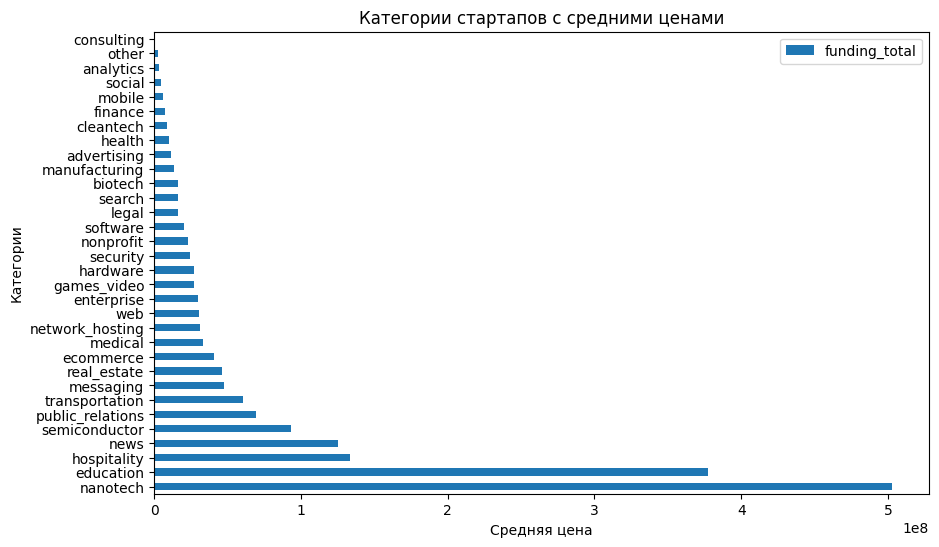

In [55]:
mean_b = filtered_data.groupby('category_code', as_index= False)['funding_total'].median().sort_values(by='funding_total',ascending= False)

mean_b.plot(kind= 'barh',
            x= 'category_code',
            figsize= (10, 6),
            title= 'Категории стартапов с средними ценами')

plt.ylabel('Категории')
plt.xlabel('Средняя цена')

plt.show()

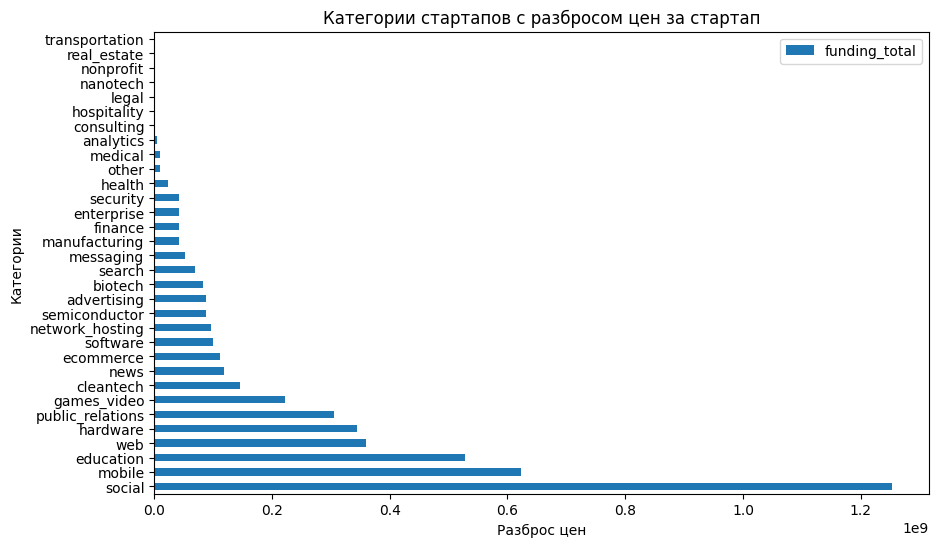

In [56]:
std_b = filtered_data.groupby('category_code', as_index= False)['funding_total'].std().sort_values(by='funding_total',ascending= False)

std_b.plot(kind= 'barh',
            x= 'category_code',
            figsize= (10, 6),
            title= 'Категории стартапов с разбросом цен за стартап')

plt.ylabel('Категории')
plt.xlabel('Разброс цен')

plt.show()

<font color='#777778'>Топ-категорий по высокими медианам:

- `Nanotech`.
- `Education`.
- `Hospitality`.
Эти три категории имеют самые высокие средние показатели финансирования, что делает их интересными.

Топ-категорий по большому разбросу цен:

- `Social`.
- `Mobile`.
- `Education`.
Эти категории демонстрируют значительные колебания в размерах инвестиций, что также привлекает внимание, ориентированных на высокую доходность.

`Education ` — категория демонстрирует одновременно высокую среднюю цену сделок и значительный разброс цен. 
`News` — несмотря на меньший разброс цен по сравнению с `Education`, эта категория всё равно остаётся привлекательной благодаря высокому среднему финансированию.

Выбрали 2 категории (`Education` и `News`), так как они выделяются сочетанием высокого среднего финансирования и достаточно большого разброса цен. Эти параметры делают их привлекательными для крупных инвесторов, которые стремятся к высоким доходам, но осознают и повышенный уровень риска.
</font>


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [57]:
df_funding_rounds = new_df[new_df['funding_rounds'] > 0]

In [58]:
df_funding_rounds.groupby('status', as_index= False).agg({'funding_rounds': ['count', 'mean', 'median']}).round(2)

status funding_rounds             
                      count  mean median
0   acquired           2593  1.90    1.0
1     closed           2089  1.38    1.0
2        ipo            490  2.53    2.0
3  operating          26535  1.64    1.0

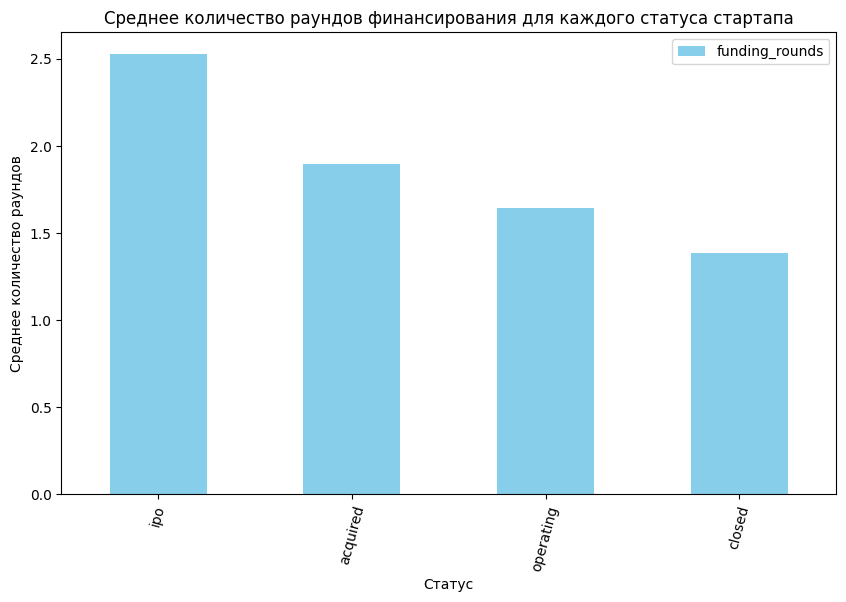

In [59]:
funding_rounds_mean = df_funding_rounds.groupby('status', 
                                     as_index= False)['funding_rounds'].mean().sort_values(by= 'funding_rounds', ascending= False)

funding_rounds_mean.plot(kind= 'bar',
                         figsize= (10, 6),
                         x= 'status',
                         title= 'Среднее количество раундов финансирования для каждого статуса стартапа',
                         color='skyblue',
                         rot= 75)

plt.ylabel('Среднее количество раундов')
plt.xlabel('Статус')

plt.show()

<font color='#777778'>

- `Acquired`: Среднее количество раундов финансирования для приобретенных стартапов составляет 1.90, медиана — 1.0. Это означает, что большинство приобретенных стартапов имели один раунд финансирования, но есть и стартапы с несколькими раундами.

- `Closed`: Среднее количество раундов для закрытых стартапов — 1.38, медиана — 1.0. Это говорит о том, что большинство закрытых стартапов также имели один раунд финансирования.

- `IPO`: Среднее количество раундов для стартапов, которые вышли на IPO, составляет 2.53, медиана — 2.0. Это указывает на то, что стартапы, выходящие на IPO, обычно проходят больше раундов финансирования.

- `Operating`: Среднее количество раундов для действующих стартапов — 1.64, медиана — 1.0. Это свидетельствует о том, что большинство действующих стартапов также имеют один раунд финансирования.
</font>


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

<font color='#777778'>Выводы:

- Среднее значение оказалось менее информативным из-за наличия выбросов, в то время как медиана дала более точное представление о центральном значении выборки.
- Категория `Education` выделяется высокими показателями как по средней сумме финансирования, так и по разбросу цен. `News` также привлекательна благодаря высокому среднему финансированию, хотя разброс цен несколько ниже.
- Приобретённые компании имели наименьшее количество раундов финансирования перед продажей, что предполагает быстрый рост и интерес со стороны покупателей. Компании, вышедшие на IPO, наоборот, требуют большего числа раундов, что отражает их стратегическое развитие и долгосрочные цели.

Выводы, сделанные на основе анализа данных, подтверждают друг друга и позволяют сделать обоснованные предположения относительно привлекательности определённых секторов рынка. Использование медианы вместо среднего значения помогает избежать влияния выбросов и даёт более точную оценку центра распределения. 

Остановились на двух категориях:
- `Education`
  - Высокая медиана финансирования.
  - Значительный разброс цен.
- `News`
  - Несмотря на меньший разброс цен по сравнению с категорией `Education`, эта категория выделяется высоким средним уровнем финансирования.

Эти категории привлекательны для крупных инвесторов, так как они сочетают высокий потенциал дохода с умеренным уровнем риска. `Education` предлагает как стабильные вложения, так и потенциал для неожиданных прорывов, а `News` пользуются спросом среди широкой аудитории, что создает устойчивый рынок.

Рекомендации основываются на анализе количественных данных, таких как среднее количество раундов финансирования и медианы цен. Это помогает инвесторам принимать взвешенные решения, учитывая как стабильность, так и возможные выгоды от рисков. Выбор двух категорий, оправдан их сочетанием высоких средних показателей финансирования и приемлемого уровня разброса цен.

</font>